In [ ]:
import os
os.getcwd()

In [ ]:
exe = 'Video_Games_5.json'
#if the exe just in current dir
print(os.path.abspath(exe))

In [14]:

try:
    from collections import OrderedDict
except ImportError:
    from ordereddict import OrderedDict
    
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
review_df = pd.read_json('Video_Games_5.json', orient='records', lines=True)

#preview the records
#review_df = review_df.rename(columns={'overall': 'Rating'})

print ("Total data:", str(review_df.shape))
sampledata=review_df.head()
sampledata.to_csv('sampleData.csv', sep=',', encoding='utf-8', index = False)



Total data: (497577, 12)


In [15]:
#import meta data of video games
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

dfmeta = getDF('meta_Video_Games.json.gz')
dfmeta.head()

,asin,description,price,imUrl,related,salesRank,categories,title,brand
0,0078764343,Brand new sealed!,37.98,http://ecx.images-amazon.com/images/I/513h6dPb...,"{'also_bought': ['B000TI836G', 'B003Q53VZC', '...",{'Video Games': 28655},"[[Video Games, Xbox 360, Games]]",NaN,NaN
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,http://ecx.images-amazon.com/images/I/61KKRndV...,"{'also_viewed': ['B000067NP1', '0439573947', '...",{'Video Games': 44080},"[[Video Games, PC, Games]]",NaN,NaN
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,http://ecx.images-amazon.com/images/I/416QZg89...,"{'also_bought': ['B000314VVU', 'B000PXUOTE', '...",{'Video Games': 49836},"[[Video Games, PC, Games]]",NaN,NaN
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,http://ecx.images-amazon.com/images/I/61Wvu-Uj...,{'also_viewed': ['043934302X']},{'Video Games': 49156},"[[Video Games, PC, Games]]",NaN,NaN
4,0439339960,a scholastic clubs fairs cd rom game,NaN,http://ecx.images-amazon.com/images/I/51k3oRCF...,{'also_viewed': ['B00028D7TG']},{'Video Games': 52262},"[[Video Games, PC, Games]]",NaN,NaN


In [16]:
dfmeta.shape

(50953, 9)

In [18]:
#merge reviews and meta data
product_reviews=pd.merge(review_df,dfmeta,on='asin',how='left')
product_reviews.head()
product_reviews = product_reviews.rename(columns={'overall': 'Rating'})

In [19]:
#size of the merged dataset and data info
product_reviews.shape
product_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497577 entries, 0 to 497576
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Rating          497577 non-null  int64  
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
 12  description     355229 non-null  object 
 13  price           356767 non-null  float64
 14  imUrl           359118 non-null  object 
 15  related         358896 non-null  object 
 16  salesRank       356347 non-null  object 
 17  categories

In [20]:
#missing values
product_reviews.isnull().sum()

Rating                 0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          76
reviewText           158
summary              109
unixReviewTime         0
vote              389784
style             208340
image             493943
description       142348
price             140810
imUrl             138459
related           138681
salesRank         141230
categories        137738
title             488405
brand             491673
dtype: int64

In [21]:
#drop records which have blank title
#product_reviews2=product_reviews.dropna(subset=['title'])
product_reviews_vg=product_reviews.dropna(subset=['reviewerName','reviewText','summary'])
product_reviews_vg.shape
product_reviews_vg.isnull().sum()

Rating                 0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText             0
summary                0
unixReviewTime         0
vote              389479
style             208230
image             493650
description       142192
price             140658
imUrl             138307
related           138529
salesRank         141078
categories        137586
title             488073
brand             491341
dtype: int64

In [13]:
#product_reviews2.title.unique()

In [14]:
#find title like Gaming Mouse

#product_reviews_GM = product_reviews2[product_reviews2["title"].str.contains("Mouse|mouse|mice|Mice")]

#product_reviews_GM.shape

In [22]:
product_reviews_vg.isnull().sum()

Rating                 0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText             0
summary                0
unixReviewTime         0
vote              389479
style             208230
image             493650
description       142192
price             140658
imUrl             138307
related           138529
salesRank         141078
categories        137586
title             488073
brand             491341
dtype: int64

In [23]:
#product_reviews_GM.head()
#product_reviews_GM.title.unique()
product_reviews_vg.shape

(497240, 20)

In [24]:
product_reviews_vg.to_csv('product_reviews_vg.csv', sep=',', encoding='utf-8', index = False)


In [25]:
#Merge reviewtext and summary
product_reviews_vg['ReviewText'] = product_reviews_vg[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_vg = product_reviews_vg.drop(['reviewText', 'summary'], axis = 1)
product_reviews_vg.head()

,Rating,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand,ReviewText
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,1445040000,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,but when you do it's great. This game is a bit...
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,1437955200,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"But in spite of that it was fun, I liked it I ..."
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,1424649600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Three Stars ok game.
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,1424390400,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Two Stars found the game a bit too complicated...
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,1419465600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"love this game great game, I love it and have ..."


In [26]:
product_reviews_vg['ReviewText'][4]


'love this game great game, I love it and have played it since its arrived'

In [27]:
#classify ratings as positive and negative based on rating column

positive_rate = len(product_reviews_vg[product_reviews_vg['Rating'] >= 3])
negative_rate = len(product_reviews_vg[product_reviews_vg['Rating'] < 3])

# Printing rates and their total numbers
print ('Positive ratings : {} reviews for Video Games'.format(positive_rate))
print ('Negative ratings : {} reviews for Video Games'.format(negative_rate))

Positive ratings : 442248 reviews for Video Games
Negative ratings : 54992 reviews for Video Games


In [28]:
#creating a binomial class for rating
product_reviews_vg['rating_class'] = product_reviews_vg['Rating'].apply(lambda x: 'negative' if x < 3 else'positive')
product_reviews_vg.head()

,Rating,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand,ReviewText,rating_class
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,1445040000,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,but when you do it's great. This game is a bit...,positive
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,1437955200,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"But in spite of that it was fun, I liked it I ...",positive
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,1424649600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Three Stars ok game.,positive
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,1424390400,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Two Stars found the game a bit too complicated...,negative
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,1419465600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"love this game great game, I love it and have ...",positive


In [29]:
#checking duplicates based on asin,reviewname and unixreviewtime

product_reviews_vg[product_reviews_vg.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]

,Rating,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand,ReviewText,rating_class
968,5,False,"05 3, 2007",A1CDNTB7377YH2,B00000DMAQ,Michael A. Newman,1178150400,NaN,NaN,NaN,Banjo-Kazooiemimics the look and feel ofMario ...,399.99,http://ecx.images-amazon.com/images/I/51CXdLRZ...,"{'also_bought': ['B00004SWLT', 'B00002STEZ', '...",{'Video Games': 1917},"[[Video Games, Kids & Family], [Video Games, M...",NaN,NaN,What a great game! I really love this game tha...,positive
969,5,False,"05 3, 2007",A1CDNTB7377YH2,B00000DMAQ,Michael A. Newman,1178150400,NaN,NaN,NaN,Banjo-Kazooiemimics the look and feel ofMario ...,399.99,http://ecx.images-amazon.com/images/I/51CXdLRZ...,"{'also_bought': ['B00004SWLT', 'B00002STEZ', '...",{'Video Games': 1917},"[[Video Games, Kids & Family], [Video Games, M...",NaN,NaN,A Whole Lot of Fun I really love this game tha...,positive
2407,5,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,1325635200,3,NaN,NaN,The Expansion Pak allows the random access mem...,308.98,http://ecx.images-amazon.com/images/I/51yx-mAQ...,"{'also_bought': ['B00002STEZ', 'B00004U1R1', '...",{'Video Games': 1811},"[[Video Games, More Systems, Nintendo 64, Hard...",NaN,NaN,Stick With First Party Hardware I have used th...,positive
2408,1,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,1325635200,NaN,NaN,NaN,The Expansion Pak allows the random access mem...,308.98,http://ecx.images-amazon.com/images/I/51yx-mAQ...,"{'also_bought': ['B00002STEZ', 'B00004U1R1', '...",{'Video Games': 1811},"[[Video Games, More Systems, Nintendo 64, Hard...",NaN,NaN,Beware Of Third Party Expansion Paks I have us...,negative
2409,1,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,1325635200,NaN,NaN,NaN,The Expansion Pak allows the random access mem...,308.98,http://ecx.images-amazon.com/images/I/51yx-mAQ...,"{'also_bought': ['B00002STEZ', 'B00004U1R1', '...",{'Video Games': 1811},"[[Video Games, More Systems, Nintendo 64, Hard...",NaN,NaN,Buy Only Nintendo Brand Expansion Pak I have u...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495475,5,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,1534118400,NaN,{'Color:': ' Black17'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Works on Raspberry Pi and PC I use mine on a R...,positive
495476,5,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,1534118400,NaN,{'Color:': ' Black16'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Great Product This is a great product, my son ...",positive
495477,5,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,1534118400,NaN,{'Color:': ' Black15'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Five Stars my son informs me this is a good co...,positive
495478,5,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,1534118400,NaN,{'Color:': ' Black14'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Awesome little controller! Been looking at Ste...,positive


In [30]:
#create time in m d yyyy format from unixreviewtime and drop reviewtime

product_reviews_vg['time'] = product_reviews_vg.reviewTime.str.replace(',', "")
product_reviews_vg['time'] = pd.to_datetime(product_reviews_vg['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
product_reviews_vg = product_reviews_vg.drop('reviewTime', axis = 1)
product_reviews_vg.head()


,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand,ReviewText,rating_class,time
0,5,True,A1HP7NVNPFMA4N,0700026657,Ambrosia075,1445040000,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,but when you do it's great. This game is a bit...,positive,2015-10-17
1,4,False,A1JGAP0185YJI6,0700026657,travis,1437955200,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"But in spite of that it was fun, I liked it I ...",positive,2015-07-27
2,3,True,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,1424649600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Three Stars ok game.,positive,2015-02-23
3,2,True,A2204E1TH211HT,0700026657,Grandma KR,1424390400,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,Two Stars found the game a bit too complicated...,negative,2015-02-20
4,5,True,A2RF5B5H74JLPE,0700026657,jon,1419465600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN,"love this game great game, I love it and have ...",positive,2014-12-25


In [31]:
product_reviews_vg = product_reviews_vg.drop(['verified','unixReviewTime','vote','style','image','imUrl','related','salesRank','title','brand'], axis = 1)
product_reviews_vg.head()

,Rating,reviewerID,asin,reviewerName,description,price,categories,ReviewText,rating_class,time
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",but when you do it's great. This game is a bit...,positive,2015-10-17
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",Three Stars ok game.,positive,2015-02-23
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",Two Stars found the game a bit too complicated...,negative,2015-02-20
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]","love this game great game, I love it and have ...",positive,2014-12-25


In [34]:
product_reviews_vg.shape

(497240, 10)

In [32]:
#renaming the columns for ease of use
product_reviews_vg.columns = ['Rating','ReviewerID','ProductID','ReviewerName','ProductDescription','Price','Categories','ReviewText','RatingClass', 'ReviewDate']


In [33]:
product_reviews_vg.head()

,Rating,ReviewerID,ProductID,ReviewerName,ProductDescription,Price,Categories,ReviewText,RatingClass,ReviewDate
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",but when you do it's great. This game is a bit...,positive,2015-10-17
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",Three Stars ok game.,positive,2015-02-23
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]",Two Stars found the game a bit too complicated...,negative,2015-02-20
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[[Video Games, PC, Games]]","love this game great game, I love it and have ...",positive,2014-12-25


In [44]:
#Descriptive Statistics


print ("================================================")

### Total reviews
total = len(product_reviews_vg)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_vg.ReviewerID.unique()))
reviewer_prop = float(len(product_reviews_vg.ReviewerID.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_vg.ProductID.unique()))
product_prop = float(len(product_reviews_vg.ProductID.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_vg.Rating.mean(),3))

print ("================================================")

Number of reviews:  497240

Number of unique reviewers:  55205
Prop of unique reviewers:  0.111

Number of unique products:  17408
Prop of unique products:  0.035

Average rating score:  4.22


Text(0, 0.5, 'Number of Reviews')

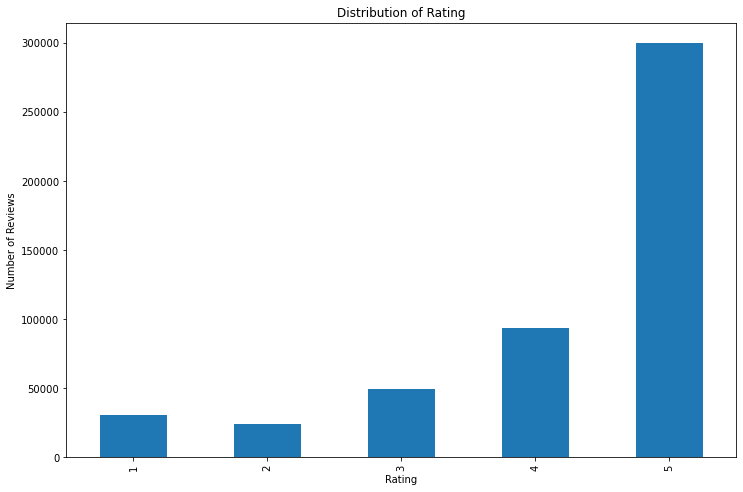

In [45]:
#Distribution of Rating

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_vg['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [47]:
#Distribution of Rating score
class_counts = product_reviews_vg.groupby('Rating').size()

class_counts

Rating
1     30866
2     24126
3     49124
4     93622
5    299502
dtype: int64

In [49]:
#Customer counts for each RatingClass
product_reviews_vg['RatingClass'].value_counts()

positive    442248
negative     54992
Name: RatingClass, dtype: int64

In [50]:

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_vg['ReviewerID'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_vg['ProductID'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_vg)/len(product_reviews_vg['ReviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_vg)/len(product_reviews_vg['ProductID'].unique()))))



Number of unique customers : 55205

Number of unique products : 17408

Review per customer: 9.007155148990128

Review per product: 28.563878676470587


In [7]:
#pip install nltk
import sys  
!{sys.executable} -m pip install contractions

     |████████████████████████████████| 321 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 260 kB 10.5 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=102812 sha256=74051a09c36152487681286827628913af8a3fc4c816877f4b00b920c4700e16
  Stored in directory: /home/jovyan/.cache/pip/wheels/fe/ea/e6/38b0d734be6936b783e916a0d8d670313fb1b2f74c5889d4fe
Successfully built pyahocorasick


In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
#cleaning the noise in ReviewText
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import contractions_dict


In [48]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match)\
                        if contractions_dict.get(match)\
                        else contractions_dict.get(match.lower())
        if expanded_contraction == None: 
            return ' '
        else:
            expanded_contraction = first_char+expanded_contraction[1:]
            return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')



def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [ ]:
product_reviews_vg['clean_text'] = product_reviews_vg['ReviewText'].map(lambda text: normalize_and_lemmaize(text))



In [ ]:
product_reviews_vg.columns = ['Rating','ReviewerID','ProductID','ReviewerName','ProductDescription','Price','Categories','ReviewText','RatingClass', 'ReviewDate','CleanText']